# Data Import

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Neural_Network/train.csv',encoding='windows-1252')
df.head()

,Time,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL,Unusual
0,10:45,3BLTE,11.642,1.393,0.370,0.041,15.655,0.644,1.114,1.025,4.0,3.0,7,1
1,9:45,1BLTE,21.791,1.891,0.537,0.268,10.273,1.154,1.353,1.085,6.0,4.0,10,1
2,7:45,9BLTE,0.498,0.398,0.015,0.010,0.262,0.164,0.995,0.995,1.0,1.0,2,1
3,2:45,4ALTE,1.891,1.095,0.940,0.024,60.715,0.825,1.035,0.995,2.0,2.0,4,1
4,3:30,10BLTE,0.303,0.404,0.016,0.013,0.348,0.168,1.011,1.011,2.0,1.0,3,0


In [ ]:
df.describe()

,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,Unusual
count,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36815.000000,36815.000000,36904.000000
mean,7.835090,2.106396,0.560525,0.067610,17.764369,1.791974,1.173441,0.665143,4.190819,3.063371,0.275932
std,8.428206,2.247514,0.727623,0.186555,15.739932,5.028928,0.214065,0.535493,1.772484,1.387446,0.446989
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.213000,0.707000,0.140000,0.021000,5.710750,0.362000,1.041000,0.010000,3.000000,2.000000,0.000000
50%,4.547000,1.314000,0.352000,0.040000,14.170000,0.703000,1.112000,1.011000,4.000000,3.000000,0.000000
75%,12.126000,2.728000,0.718000,0.075000,25.059500,1.242000,1.263000,1.051000,5.000000,4.000000,1.000000
max,51.333000,77.505000,19.601000,12.461000,140.008000,48.253000,2.915000,2.668000,12.000000,12.000000,1.000000


# Exploratory Data Analysis

In [ ]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,Unusual
PRBUsageUL,1.000000,0.449178,0.482782,0.286596,0.461718,0.217282,0.659076,0.548276,0.713524,0.812626,-0.117299
PRBUsageDL,0.449178,1.000000,0.793071,0.250486,0.452983,0.298500,0.607479,0.002317,0.618984,0.603546,-0.090100
meanThr_DL,0.482782,0.793071,1.000000,0.299374,0.629836,0.486367,0.488197,0.086440,0.499982,0.508359,-0.065517
meanThr_UL,0.286596,0.250486,0.299374,1.000000,0.199296,0.409001,0.233858,0.026614,0.239803,0.245076,-0.035196
maxThr_DL,0.461718,0.452983,0.629836,0.199296,1.000000,0.337199,0.427594,0.125389,0.507722,0.479198,-0.066574
maxThr_UL,0.217282,0.298500,0.486367,0.409001,0.337199,1.000000,0.151108,-0.077402,0.185757,0.182006,-0.020630
meanUE_DL,0.659076,0.607479,0.488197,0.233858,0.427594,0.151108,1.000000,0.237731,0.876911,0.833129,-0.168308
meanUE_UL,0.548276,0.002317,0.086440,0.026614,0.125389,-0.077402,0.237731,1.000000,0.196902,0.357789,-0.027191
maxUE_DL,0.713524,0.618984,0.499982,0.239803,0.507722,0.185757,0.876911,0.196902,1.000000,0.864536,-0.138684
maxUE_UL,0.812626,0.603546,0.508359,0.245076,0.479198,0.182006,0.833129,0.357789,0.864536,1.000000,-0.118986


In [ ]:
df = df.drop(['maxUE_DL','maxUE_UL','maxUE_UL+DL'],axis=1)

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,Unusual
PRBUsageUL,1.000000,0.449178,0.482782,0.286596,0.461718,0.217282,0.659076,0.548276,-0.117299
PRBUsageDL,0.449178,1.000000,0.793071,0.250486,0.452983,0.298500,0.607479,0.002317,-0.090100
meanThr_DL,0.482782,0.793071,1.000000,0.299374,0.629836,0.486367,0.488197,0.086440,-0.065517
meanThr_UL,0.286596,0.250486,0.299374,1.000000,0.199296,0.409001,0.233858,0.026614,-0.035196
maxThr_DL,0.461718,0.452983,0.629836,0.199296,1.000000,0.337199,0.427594,0.125389,-0.066574
maxThr_UL,0.217282,0.298500,0.486367,0.409001,0.337199,1.000000,0.151108,-0.077402,-0.020630
meanUE_DL,0.659076,0.607479,0.488197,0.233858,0.427594,0.151108,1.000000,0.237731,-0.168308
meanUE_UL,0.548276,0.002317,0.086440,0.026614,0.125389,-0.077402,0.237731,1.000000,-0.027191
Unusual,-0.117299,-0.090100,-0.065517,-0.035196,-0.066574,-0.020630,-0.168308,-0.027191,1.000000


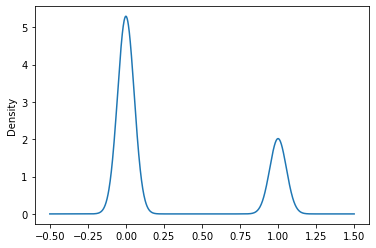

In [ ]:
df['Unusual'].plot(kind='kde')

In [ ]:
print("Value Count:\n",df["Unusual"].value_counts())
#  try in percentage as well
df.Unusual.value_counts(normalize=True)

Value Count:
 0    26721
1    10183
Name: Unusual, dtype: int64


0    0.724068
1    0.275932
Name: Unusual, dtype: float64

In [ ]:
df.isnull().sum()

Time          0
CellName      0
PRBUsageUL    0
PRBUsageDL    0
meanThr_DL    0
meanThr_UL    0
maxThr_DL     0
maxThr_UL     0
meanUE_DL     0
meanUE_UL     0
Unusual       0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

Time          0
CellName      0
PRBUsageUL    0
PRBUsageDL    0
meanThr_DL    0
meanThr_UL    0
maxThr_DL     0
maxThr_UL     0
meanUE_DL     0
meanUE_UL     0
Unusual       0
dtype: int64

# Feature Engineering

In [ ]:

# You can typecast to int using astype(int) and divide it by 10**9 to get the number of seconds to the unix epoch start.
df['Time'] = pd.to_datetime(df['Time']).astype(int)/ 10**9

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [ ]:
# split cellName to digits and String
result = df['CellName'].str.split('(\d+)([A-Za-z]+)', expand=True)
df['Cell_power'] = result[1]
# get the first alphabet of string as category[A, B, C, U, V, W] 
df['Cell_category']= result[2].astype(str).str[0]
# one hot encoding for category
df = pd.concat([df,pd.get_dummies(df['Cell_category'])],axis=1)
# Cell name features have been used already drop redundant column
df =df.drop(['Cell_category','CellName'],axis=1)

In [ ]:
df.dtypes

Time          float64
PRBUsageUL    float64
PRBUsageDL    float64
meanThr_DL    float64
meanThr_UL    float64
maxThr_DL     float64
maxThr_UL     float64
meanUE_DL     float64
meanUE_UL     float64
Unusual         int64
Cell_power     object
A               uint8
B               uint8
C               uint8
U               uint8
V               uint8
W               uint8
dtype: object

In [ ]:
df['Cell_power'] = df['Cell_power'].astype('int') 

In [ ]:
df.dtypes

Time          float64
PRBUsageUL    float64
PRBUsageDL    float64
meanThr_DL    float64
meanThr_UL    float64
maxThr_DL     float64
maxThr_UL     float64
meanUE_DL     float64
meanUE_UL     float64
Unusual         int64
Cell_power      int64
A               uint8
B               uint8
C               uint8
U               uint8
V               uint8
W               uint8
dtype: object

In [ ]:
X_train=df.loc[:, df.columns != 'Unusual']
Y_train= df['Unusual'].astype('int')

In [ ]:

# When normalizing we simply subtract the mean and divide by standard deviation.
X_train = X_train.apply(lambda iterator: ((iterator - iterator.mean())/iterator.std()).round(2))

In [ ]:
X_train.head()

,Time,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,Cell_power,A,B,C,U,V,W
0,-0.14,0.45,-0.32,-0.26,-0.14,-0.13,-0.23,-0.28,0.67,-1.09,-0.66,1.63,-0.57,-0.25,-0.25,-0.25
1,-0.28,1.66,-0.10,-0.03,1.07,-0.48,-0.13,0.84,0.78,-1.87,-0.66,1.63,-0.57,-0.25,-0.25,-0.25
2,-0.57,-0.87,-0.76,-0.75,-0.31,-1.11,-0.32,-0.83,0.62,1.26,-0.66,1.63,-0.57,-0.25,-0.25,-0.25
3,-1.30,-0.71,-0.45,0.52,-0.23,2.73,-0.19,-0.65,0.62,-0.70,1.51,-0.61,-0.57,-0.25,-0.25,-0.25
4,-1.19,-0.89,-0.76,-0.75,-0.29,-1.11,-0.32,-0.76,0.65,1.65,-0.66,1.63,-0.57,-0.25,-0.25,-0.25


In [ ]:
Y_train.head()

0    1
1    1
2    1
3    1
4    0
Name: Unusual, dtype: int64

In [ ]:
X_train

,Time,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,Cell_power,A,B,C,U,V,W
0,-0.14,0.45,-0.32,-0.26,-0.14,-0.13,-0.23,-0.28,0.67,-1.09,-0.66,1.63,-0.57,-0.25,-0.25,-0.25
1,-0.28,1.66,-0.10,-0.03,1.07,-0.48,-0.13,0.84,0.78,-1.87,-0.66,1.63,-0.57,-0.25,-0.25,-0.25
2,-0.57,-0.87,-0.76,-0.75,-0.31,-1.11,-0.32,-0.83,0.62,1.26,-0.66,1.63,-0.57,-0.25,-0.25,-0.25
3,-1.30,-0.71,-0.45,0.52,-0.23,2.73,-0.19,-0.65,0.62,-0.70,1.51,-0.61,-0.57,-0.25,-0.25,-0.25
4,-1.19,-0.89,-0.76,-0.75,-0.29,-1.11,-0.32,-0.76,0.65,1.65,-0.66,1.63,-0.57,-0.25,-0.25,-0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36899,1.42,-0.03,-0.58,-0.54,-0.16,-0.62,-0.28,-0.34,-1.22,0.09,1.51,-0.61,-0.57,-0.25,-0.25,-0.25
36900,-0.28,0.15,-0.40,-0.51,-0.20,0.11,-0.04,-0.24,0.68,0.87,-0.66,-0.61,1.76,-0.25,-0.25,-0.25
36901,0.26,-0.41,-0.54,-0.30,-0.20,-0.36,-0.25,-0.51,0.63,1.26,-0.66,1.63,-0.57,-0.25,-0.25,-0.25
36902,0.11,0.65,0.28,-0.00,-0.01,0.66,-0.18,0.23,0.74,-1.09,-0.66,-0.61,1.76,-0.25,-0.25,-0.25


In [ ]:
Y_train

0        1
1        1
2        1
3        1
4        0
        ..
36899    0
36900    0
36901    1
36902    0
36903    0
Name: Unusual, Length: 36904, dtype: int64

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()


In [ ]:
# train the model
regressor.fit(X_train, Y_train)


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import f1_score

y_pred = regressor.predict(X_train)
classification_report_= classification_report(Y_train, y_pred)
print("classification_report_\n",classification_report_)
print('\n f1score: ',f1_score(Y_train, y_pred, zero_division=1))
print('\n Accuracy: ', accuracy_score(Y_train, y_pred))


classification_report_
               precision    recall  f1-score   support

           0       0.72      0.99      0.84     26721
           1       0.20      0.01      0.01     10183

    accuracy                           0.72     36904
   macro avg       0.46      0.50      0.42     36904
weighted avg       0.58      0.72      0.61     36904


 f1score:  0.010702341137123745

 Accuracy:  0.7194613050075872


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train, y_pred)

array([[26495,   226],
       [10127,    56]])

In [ ]:
from sklearn.decomposition import PCA

pca_celltower = PCA(n_components=2)
principalComponents_celltower = pca_celltower.fit_transform(X_train)

In [ ]:
principal_celltower_Df = pd.DataFrame(data = principalComponents_celltower
             , columns = ['PCA1', 'PCA2'])

In [ ]:
principal_celltower_Df.tail()

,PCA1,PCA2
36899,-0.995812,0.091199
36900,-0.506793,-0.924284
36901,-0.711205,-0.406815
36902,0.913858,-1.224862
36903,3.175248,-0.925573


In [ ]:
print('Explained variation per principal component: {}'.format(pca_celltower.explained_variance_ratio_))

Explained variation per principal component: [0.23872333 0.12398447]


<Figure size 432x288 with 0 Axes>

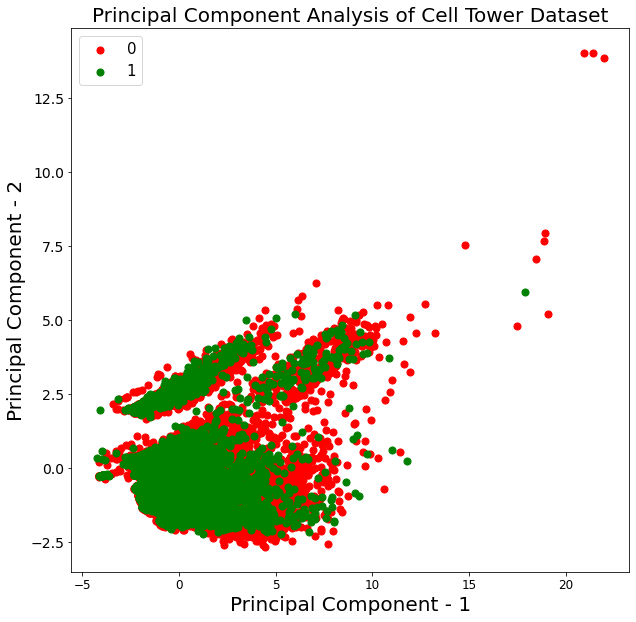

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Cell Tower Dataset",fontsize=20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df['Unusual'] == target
    plt.scatter(principal_celltower_Df.loc[indicesToKeep, 'PCA1']
               , principal_celltower_Df.loc[indicesToKeep, 'PCA2'], c = color, s = 50)
plt.legend(targets,prop={'size': 15})

# Neural Network

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.layers import Dense
from keras.models import Sequential

model_m = Sequential()
model_m.add(Dense(500, activation='relu',kernel_initializer='random_normal',input_dim=16))
# model_m.add(Dense(32, activation='relu',kernel_initializer='random_normal',input_dim=16))
model_m.add(Dense(100, activation='relu',kernel_initializer='random_normal'))
# model_m.add(Dense(50, activation='sigmoid',kernel_initializer='random_normal'))
model_m.add(Dense(2, activation='softmax'))

# Compile the model
model_m.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [ ]:
model_m.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 500)               8500      
                                                                 
 dense_35 (Dense)            (None, 100)               50100     
                                                                 
 dense_36 (Dense)            (None, 2)                 202       
                                                                 
Total params: 58,802
Trainable params: 58,802
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_m.fit(X_train, Y_train, epochs=20)
# Encountered error here 

In [ ]:
from tensorflow import keras
model = keras.Sequential(
    [
        keras.layers.Dense(
            256, activation="relu", input_shape=(X_train.shape[-1],)
        ),
        keras.layers.Dense(256, activation="relu"),
        # keras.layers.Dropout(0.3),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(32, activation="relu"),
        # keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation="softmax"),
    ]
)
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 256)               4352      
                                                                 
 dense_42 (Dense)            (None, 256)               65792     
                                                                 
 dense_43 (Dense)            (None, 128)               32896     
                                                                 
 dense_44 (Dense)            (None, 32)                4128      
                                                                 
 dense_45 (Dense)            (None, 1)                 33        
                                                                 
Total params: 107,201
Trainable params: 107,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs=20)

Epoch 1/20
1154/1154 [==============================] - 4s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2759
Epoch 2/20
1154/1154 [==============================] - 4s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2759
Epoch 3/20
1154/1154 [==============================] - 4s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2759
Epoch 4/20
1154/1154 [==============================] - 4s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2759
Epoch 5/20
1154/1154 [==============================] - 4s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2759
Epoch 6/20
1154/1154 [==============================] - 4s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2759
Epoch 7/20
1154/1154 [==============================] - 4s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2759
Epoch 8/20
1154/1154 [==============================] - 8s 7ms/step - loss: 0.0000e+00 - accuracy: 0.2759
Epoch 9/20
1154/1154 [==============================] - 6s 5ms/step - loss: 0.0000e+00 - accuracy: 0.2759
Epoch 10/20
1154/1154 [=======================

In [ ]:
# Different Metrices
metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    keras.metrics.Accuracy(name="accuracy",dtype=None)
]


In [ ]:
# Loss function as binary_crossentropy
model.compile(
    optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics=metrics
)

In [ ]:
model.fit(
    X_train,
    Y_train,
    batch_size=100,
    epochs=30,
    verbose=2
)

Epoch 1/30
370/370 - 5s - loss: 798741846032384.0000 - fn: 0.0000e+00 - fp: 26721.0000 - tn: 0.0000e+00 - tp: 10183.0000 - precision: 0.2759 - recall: 1.0000 - accuracy: 0.2759 - 5s/epoch - 14ms/step
Epoch 2/30
370/370 - 3s - loss: 473304456495104.0000 - fn: 0.0000e+00 - fp: 26721.0000 - tn: 0.0000e+00 - tp: 10183.0000 - precision: 0.2759 - recall: 1.0000 - accuracy: 0.2759 - 3s/epoch - 7ms/step
Epoch 3/30
370/370 - 3s - loss: 294116910956544.0000 - fn: 0.0000e+00 - fp: 26721.0000 - tn: 0.0000e+00 - tp: 10183.0000 - precision: 0.2759 - recall: 1.0000 - accuracy: 0.2759 - 3s/epoch - 8ms/step
Epoch 4/30
370/370 - 2s - loss: 189975127654400.0000 - fn: 0.0000e+00 - fp: 26721.0000 - tn: 0.0000e+00 - tp: 10183.0000 - precision: 0.2759 - recall: 1.0000 - accuracy: 0.2759 - 2s/epoch - 6ms/step
Epoch 5/30
370/370 - 2s - loss: 126206993235968.0000 - fn: 0.0000e+00 - fp: 26721.0000 - tn: 0.0000e+00 - tp: 10183.0000 - precision: 0.2759 - recall: 1.0000 - accuracy: 0.2759 - 2s/epoch - 5ms/step
Epoc

# References

In [ ]:
# https://www.pluralsight.com/guides/classification-keras
# https://keras.io/examples/structured_data/imbalanced_classification/
